In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('GDPlist.csv', encoding = 'ISO-8859-1')
data.head()


,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [3]:
#Bộ dữ liệu chứa bn dòng bn cột
print("Số dòng: ", data.shape[0])
print("số cột: ", data.shape[1])

Số dòng:  125
số cột:  3


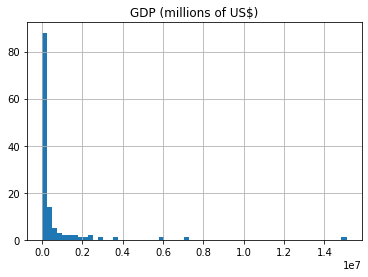

In [4]:
#Biểu đồ histogram thể hiện tần xuất
data.hist(column ='GDP (millions of US$)', bins = 60)
plt.show()

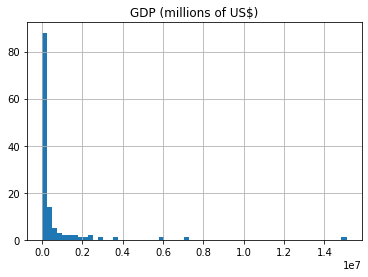

In [5]:
#Cách 2: dùng matplotlib
plt.hist(data['GDP (millions of US$)'], bins = 60)
plt.grid(True)
plt.title('GDP (millions of US$)')
plt.show()

In [6]:
#mỗi châu lục có bn quốc gia nằm trong bảng dữ liệu
print('Trong thống kê có các châu lục là: ', end = ' ')
print(*data['Continent'].unique(), sep = ', ')
print("Số lượng châu lục là: ", data['Continent'].unique().size)

Trong thống kê có các châu lục là:  Asia, Europe, Africa, South America, Oceania, North America
Số lượng châu lục là:  6


In [7]:
soluong = data.groupby('Continent')['Country'].count()
print(soluong)

Continent
Africa           29
Asia             36
Europe           37
North America    11
Oceania           3
South America     9
Name: Country, dtype: int64


In [8]:
print("Số lượng các quốc gia trong: ", end = ' ')
print(*data['Continent'].unique(), sep = ', ', end = ' ')
print("lần lượt là: ", end = ' ')
print(*soluong, sep = ', ', end = '.')

Số lượng các quốc gia trong:  Asia, Europe, Africa, South America, Oceania, North America lần lượt là:  29, 36, 37, 11, 3, 9.

In [9]:
#Tổng GDP của mỗi châu lục
total_gdp = data.groupby(['Continent'])['GDP (millions of US$)'].sum()
total_gdp.head()

Continent
Africa            1820811
Asia             24425891
Europe           19139380
North America    18238447
Oceania           1662727
Name: GDP (millions of US$), dtype: int64

In [10]:
#Top 10 quốc gia có GDP cao nhất
quantity_contry = data.groupby(['Country','Continent'])['GDP (millions of US$)'].sum().sort_values(ascending= False)
quantity_contry.head(10)

Country          Continent    
 United States   North America    15094025
 China           Asia              7298147
 Japan           Asia              5869471
 Germany         Europe            3577031
 France          Europe            2776324
 Brazil          South America     2492908
 United Kingdom  Europe            2417570
 Italy           Europe            2198730
 Russia          Asia              1850401
 Canada          North America     1736869
Name: GDP (millions of US$), dtype: int64

In [11]:
#Việt hóa tên các cột trong bảng dữ liệu: Country 🡪 Nuoc; Continent 🡪 Chauluc; GDP (millions of US$) 🡪 GDP (trieu $)
data.columns = ['Nuoc', 'Chauluc', 'GDP (trieu $)']
data

,Nuoc,Chauluc,GDP (trieu $)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
...,...,...,...
120,Uzbekistan,Asia,45353
121,Venezuela,South America,315841
122,Vietnam,Asia,122722
123,Yemen,Africa,33675


In [12]:
#Chèn thêm một cột “Thanhpho” vào sau cột “Nuoc”, giá trị ban đầu là giá trị của cột “Nuoc”
data.insert(1, 'Thanhpho', pd.Series(data['Nuoc'], index=data.index))
data

,Nuoc,Thanhpho,Chauluc,GDP (trieu $)
0,Afghanistan,Afghanistan,Asia,18181
1,Albania,Albania,Europe,12847
2,Algeria,Algeria,Africa,190709
3,Angola,Angola,Africa,100948
4,Argentina,Argentina,South America,447644
...,...,...,...,...
120,Uzbekistan,Uzbekistan,Asia,45353
121,Venezuela,Venezuela,South America,315841
122,Vietnam,Vietnam,Asia,122722
123,Yemen,Yemen,Africa,33675


In [13]:
#Trong cột Thanhpho, thay giá trị Vietnam thành Hanoi; Làm tương tự với các nước còn lại.
print(*data['Nuoc'].unique(), sep = ', ', end = ' ')
print("Tổng số nước là: ", data['Nuoc'].unique().size)

 Afghanistan,  Albania,  Algeria,  Angola,  Argentina,  Australia,  Austria,  Azerbaijan,  Bahrain,  Bangladesh,  Belarus,  Belgium,  Bolivia,  Bosnia and Herzegovina,  Botswana,  Brazil,  Brunei,  Bulgaria,  Burma,  Cambodia,  Cameroon,  Canada,  Chile,  China,  Colombia,  Congo, Democratic Republic of the,  Congo, Republic of the,  Costa Rica,  Côte d'Ivoire,  Croatia,  Cyprus,  Czech Republic,  Denmark,  Dominican Republic,  Ecuador,  Egypt,  El Salvador,  Equatorial Guinea,  Estonia,  Ethiopia,  Finland,  France,  Gabon,  Georgia,  Germany,  Ghana,  Greece,  Guatemala,  Honduras,  Hong Kong,  Hungary,  Iceland,  India,  Indonesia,  Iran,  Iraq,  Ireland,  Israel,  Italy,  Jamaica,  Japan,  Jordan,  Kazakhstan,  Kenya,  Kuwait,  Latvia,  Lebanon,  Libya,  Lithuania,  Luxembourg,  Malaysia,  Mali,  Mauritius,  Mexico,  Morocco,  Mozambique,  Namibia,  Nepal,  Netherlands,  New Zealand,  Nigeria,  Norway,  Oman,  Pakistan,  Panama,  Papua New Guinea,  Paraguay,  Peru,  Philippines,  P

In [14]:
data['Thanhpho'].replace('Vietnam','Hanoi',inplace = True)
data

,Nuoc,Thanhpho,Chauluc,GDP (trieu $)
0,Afghanistan,Afghanistan,Asia,18181
1,Albania,Albania,Europe,12847
2,Algeria,Algeria,Africa,190709
3,Angola,Angola,Africa,100948
4,Argentina,Argentina,South America,447644
...,...,...,...,...
120,Uzbekistan,Uzbekistan,Asia,45353
121,Venezuela,Venezuela,South America,315841
122,Vietnam,Vietnam,Asia,122722
123,Yemen,Yemen,Africa,33675


In [15]:
#Xóa các bản ghi có Chauluc là ‘Asia’
data.drop(data[data['Chauluc'] == 'Asia'].index, axis = 0, inplace=True)
data

,Nuoc,Thanhpho,Chauluc,GDP (trieu $)
1,Albania,Albania,Europe,12847
2,Algeria,Algeria,Africa,190709
3,Angola,Angola,Africa,100948
4,Argentina,Argentina,South America,447644
5,Australia,Australia,Oceania,1488221
...,...,...,...,...
118,United States,United States,North America,15094025
119,Uruguay,Uruguay,South America,46872
121,Venezuela,Venezuela,South America,315841
123,Yemen,Yemen,Africa,33675


In [16]:
#Xóa các bản ghi có GDP < 300000

data.drop(data[data['GDP (trieu $)'] < 300000].index, axis = 0, inplace=True)
data

,Nuoc,Thanhpho,Chauluc,GDP (trieu $)
4,Argentina,Argentina,South America,447644
5,Australia,Australia,Oceania,1488221
6,Austria,Austria,Europe,419243
11,Belgium,Belgium,Europe,513396
15,Brazil,Brazil,South America,2492908
21,Canada,Canada,North America,1736869
24,Colombia,Colombia,South America,328422
32,Denmark,Denmark,Europe,333238
41,France,France,Europe,2776324
44,Germany,Germany,Europe,3577031
